# Exploratory data analysis

We will look at 'intakes.csv' and 'outcomes.csv' data from from animal shelter in Austin, Texas USA. Data are from from [verified city data](https://data.austintexas.gov/). The time interval for both datasets is from October 1, 2013 to April 27, 2022.

We will explore these datasets. First, we will do preprocessing and then some descriptive statistics. Lastly, we will use visualization to answer some questions regarding this data.

**Questions**
* Does 'Outcome Type' depend on 'Intake Type'? Consider animals that appear in both datasets just once.
* Does the age of the animal play a role in adoption?
* Is animal intake constant throughout the year?
* Does sex play a role in 'Intake Condition'?
* Is some age category more prone to being sick?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Intakes data preprocessing

In [2]:
intakes = pd.read_csv('intakes.csv')
print(intakes.shape)
intakes.info()

(138585, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Dataset intakes has 138 585 samples and 12 features. All features are of type object.

It seems that for the most part, every row has every column filled except for 'Name'. 'Name' has a substantial amount of null values.

In [3]:
intakes.head(50)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate
6,A635072,Beowulf,04/16/2019 09:53:00 AM,April 2019,415 East Mary Street in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Great Dane Mix,Black
7,A844350,*Ella,10/15/2021 11:40:00 AM,October 2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby
8,A708452,Mumble,07/30/2015 02:37:00 PM,July 2015,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White
9,A818975,NaN,06/18/2020 02:53:00 PM,June 2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby


### Features

* Animal ID - identification of the animal
* Name - name of the animal
* DateTime - date and time of intake
* MonthYear - month and year of intake
* FoundLocation - the location where the animal was found
* Intake Type - intake type
* Intake Condition - condition of the animal upon intake
* Animal Type - animal type
* Sex upon Intake - sex of the animal upon intake
* Age upon Intake - age of the animal upon intake
* Breed - breed
* Color - color of the animal

Number of unique values for each feature.

In [4]:
for col in intakes:
    print(str(col) + ": " + str(intakes[col].nunique()))

Animal ID: 123890
Name: 23544
DateTime: 97442
MonthYear: 103
Found Location: 58367
Intake Type: 6
Intake Condition: 15
Animal Type: 5
Sex upon Intake: 5
Age upon Intake: 54
Breed: 2741
Color: 616


For features with low number of unique values, we will look at the values.

In [5]:
print('Intake Type:', end=' ')
print(intakes['Intake Type'].unique())
print()
print('Intake Condition:', end=' ')
print(intakes['Intake Condition'].unique())
print()
print('Animal Type:', end=' ')
print(intakes['Animal Type'].unique())
print()
print('Sex upon Intake:', end=' ')
print(intakes['Sex upon Intake'].unique())

Intake Type: ['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request'
 'Abandoned']

Intake Condition: ['Normal' 'Sick' 'Injured' 'Pregnant' 'Nursing' 'Aged' 'Medical' 'Other'
 'Neonatal' 'Feral' 'Behavior' 'Med Urgent' 'Space' 'Med Attn' 'Panleuk']

Animal Type: ['Dog' 'Cat' 'Other' 'Bird' 'Livestock']

Sex upon Intake: ['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]


## Intakes data conversion and cleanup

We can see that 'DateTime' is in month/day/year/time format. This makes the feature 'MonthYear' redundant. We can drop this feature without harm. Duplicate samples will be dropped as well.

In [6]:
intakes = intakes.drop('MonthYear', axis=1)
intakes = intakes.drop_duplicates()
intakes.shape

(138565, 11)

Furthermore, we can notice (for example in row #39) that missing information is filled as 'Unknown'. It will be retyped into NaN.

In [7]:
intakes = intakes.replace('Unknown', np.nan)

In [8]:
intakes.isnull().sum(axis=0)

Animal ID               0
Name                41284
DateTime                0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake     11067
Age upon Intake         0
Breed                   3
Color                   0
dtype: int64

Now we see that a lot of data is missing in 'Name' and a little bit is missing in 'Sex upon Intake. However, this doesn't matter much for our purposes so we won't do anything with it.

First, we will make a new feature 'Age upon Intake (days)', which just represents age in days, so we have a feature that doesn't lose 'accuracy' of some data. We will delete samples with negative age and we will consider age 0 as a newborn. 'Age upon Intake' will be converted into a float data type (in years).

In [9]:
#Function to calculate age in years, rounded up to 2 decimal places
def calculate_age_year(row, column):
    if pd.isnull(row[column]):
        return np.nan
    
    tmp = row[column].split()

    if tmp[1].startswith('year'):
        return round(int(tmp[0]), 2)
    elif tmp[1].startswith('month'):
        return round(int(tmp[0]) * 30 / 365, 2)
    elif tmp[1].startswith('week'):
        return round(int(tmp[0]) * 7 / 365, 2)
    else:
        return round(int(tmp[0]) / 365, 2)

In [10]:
#Function to calculate age in days
def calculate_age_day(row, column):
    if pd.isnull(row[column]):
        return np.nan
    
    tmp = row[column].split()

    if tmp[1].startswith('year'):
        return int(tmp[0]) * 365
    elif tmp[1].startswith('month'):
        return int(tmp[0]) * 30
    elif tmp[1].startswith('week'):
        return int(tmp[0]) * 7
    else:
        return int(tmp[0])

In [11]:
intakes['Age upon Intake (days)'] = intakes.apply(calculate_age_day, column='Age upon Intake', axis=1)
intakes = intakes.drop(intakes[intakes['Age upon Intake (days)'] < 0].index)
intakes['Age upon Intake'] = intakes.apply(calculate_age_year, column='Age upon Intake', axis=1)

'DateTime' will be converted into a datetime64[ms] data type.

In [12]:
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

In [13]:
intakes.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Age upon Intake (days)
0,A786884,*Brock,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2.00,Beagle Mix,Tricolor,730
1,A706918,Belle,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8.00,English Springer Spaniel,White/Liver,2920
2,A724273,Runster,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0.90,Basenji Mix,Sable/White,330
3,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,0.08,Domestic Shorthair Mix,Calico,28
4,A682524,Rio,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4.00,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,1460


In [14]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138557 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Animal ID               138557 non-null  object        
 1   Name                    97273 non-null   object        
 2   DateTime                138557 non-null  datetime64[ns]
 3   Found Location          138557 non-null  object        
 4   Intake Type             138557 non-null  object        
 5   Intake Condition        138557 non-null  object        
 6   Animal Type             138557 non-null  object        
 7   Sex upon Intake         127490 non-null  object        
 8   Age upon Intake         138557 non-null  float64       
 9   Breed                   138554 non-null  object        
 10  Color                   138557 non-null  object        
 11  Age upon Intake (days)  138557 non-null  int64         
dtypes: datetime64[ns](1), float64(1), i

Categorical data will be changed into a category data type. Numeric data (Age) are already in correct dtype.

'Animal ID' is definition-wise categorical, however, most of its values are unique. Therefore, converting it into a category data type won't help memory/performace-wise, we will leave it as an object. Same applies to 'Name' and 'Found Location'.

In [15]:
for col in ['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color']:
    intakes[col] = intakes[col].astype('category')

In [16]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138557 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Animal ID               138557 non-null  object        
 1   Name                    97273 non-null   object        
 2   DateTime                138557 non-null  datetime64[ns]
 3   Found Location          138557 non-null  object        
 4   Intake Type             138557 non-null  category      
 5   Intake Condition        138557 non-null  category      
 6   Animal Type             138557 non-null  category      
 7   Sex upon Intake         127490 non-null  category      
 8   Age upon Intake         138557 non-null  float64       
 9   Breed                   138554 non-null  category      
 10  Color                   138557 non-null  category      
 11  Age upon Intake (days)  138557 non-null  int64         
dtypes: category(6), datetime64[ns](1), 

# Outcomes data preprocessing

In [17]:
outcomes = pd.read_csv('outcomes.csv')
print(outcomes.shape)
outcomes.info()

(138769, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Dataset outcomes has 138 769 samples and 12 features. All features are of type object.

There's a lot of null values in 'Name' and 'Outcome Subtype'.

In [18]:
outcomes.head(50)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
5,A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown
6,A814515,Quentin,05/06/2020 07:59:00 AM,May 2020,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
7,A689724,*Donatello,10/18/2014 06:52:00 PM,Oct 2014,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
8,A680969,*Zeus,08/05/2014 04:59:00 PM,Aug 2014,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
9,A840370,Tulip,08/19/2021 07:36:00 PM,Aug 2021,08/06/2019,Adoption,NaN,Dog,Spayed Female,2 years,Border Collie/Cardigan Welsh Corgi,Black/White


### Features

Features with counterparts in Intakes dataset have the same meaning.

* Date of Birth - date of birth of the animal
* Outcome Subtype - subtype of outcome, more specific

Number of unique values fro each feature.

In [19]:
for col in outcomes:
    print(str(col) + ": " + str(outcomes[col].nunique()))

Animal ID: 124068
Name: 23425
DateTime: 115364
MonthYear: 103
Date of Birth: 7576
Outcome Type: 9
Outcome Subtype: 26
Animal Type: 5
Sex upon Outcome: 5
Age upon Outcome: 54
Breed: 2749
Color: 619


For features with low number of unique values, we will look at the values.

In [20]:
print('Outcome Type:', end=' ')
print(outcomes['Outcome Type'].unique())
print()
print('Animal Type:', end=' ')
print(outcomes['Animal Type'].unique())
print()
print('Sex upon Outcome:', end=' ')
print(outcomes['Sex upon Outcome'].unique())

Outcome Type: ['Rto-Adopt' 'Adoption' 'Euthanasia' 'Transfer' 'Return to Owner' 'Died'
 'Disposal' 'Missing' 'Relocate' nan]

Animal Type: ['Cat' 'Dog' 'Other' 'Bird' 'Livestock']

Sex upon Outcome: ['Neutered Male' 'Unknown' 'Intact Male' 'Spayed Female' 'Intact Female'
 nan]


Pro příznaky s malým počtem unikátních hodnot vypíšem i tyto hodnoty.

## Outcomes data conversion and cleanup

'MonthYear' here is yet again redundant. we will use 'DateTime'. We can see (in row #2) that 'Unknown' is used for missing information, it will be converted to NaN. Duplicate samples will be dropped. 

In [21]:
outcomes = outcomes.drop('MonthYear', axis=1)
outcomes = outcomes.drop_duplicates()
outcomes.shape

(138752, 11)

In [22]:
outcomes = outcomes.replace('Unknown', np.nan)
outcomes.isnull().sum(axis=0)

Animal ID               0
Name                41269
DateTime                0
Date of Birth           0
Outcome Type           23
Outcome Subtype     75325
Animal Type             0
Sex upon Outcome    11052
Age upon Outcome        5
Breed                   3
Color                   0
dtype: int64

There's a lot of missing data in 'Name', 'Outcome Subtype' and a bit in 'Sex upon Outcome'. This doesn't matter much, we will leave it.

We will use the same process for features as with Intakes dataset.

In [23]:
outcomes['Age upon Outcome (days)'] = outcomes.apply(calculate_age_day, column='Age upon Outcome', axis=1)
outcomes['Age upon Outcome'] = outcomes.apply(calculate_age_year, column='Age upon Outcome', axis=1)
outcomes = outcomes.drop(outcomes[outcomes['Age upon Outcome (days)'] < 0].index)

In [24]:
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format='%m/%d/%Y %I:%M:%S %p')

In [25]:
outcomes.head()

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age upon Outcome (days)
0,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2.00,Domestic Shorthair Mix,Brown Tabby/White,730.0
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,Neutered Male,1.00,Chihuahua Shorthair Mix,White/Brown,365.0
2,A821648,NaN,2020-08-16 11:38:00,08/16/2019,Euthanasia,NaN,Other,NaN,1.00,Raccoon,Gray,365.0
3,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,NaN,Dog,Neutered Male,0.33,Anatol Shepherd/Labrador Retriever,Buff,120.0
4,A674754,NaN,2014-03-18 11:47:00,03/12/2014,Transfer,Partner,Cat,Intact Male,0.02,Domestic Shorthair Mix,Orange Tabby,6.0


In [26]:
outcomes['Age upon Outcome (days)'] = outcomes['Age upon Outcome (days)'].astype('Int64')
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138744 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Animal ID                138744 non-null  object        
 1   Name                     97475 non-null   object        
 2   DateTime                 138744 non-null  datetime64[ns]
 3   Date of Birth            138744 non-null  object        
 4   Outcome Type             138721 non-null  object        
 5   Outcome Subtype          63426 non-null   object        
 6   Animal Type              138744 non-null  object        
 7   Sex upon Outcome         127692 non-null  object        
 8   Age upon Outcome         138739 non-null  float64       
 9   Breed                    138741 non-null  object        
 10  Color                    138744 non-null  object        
 11  Age upon Outcome (days)  138739 non-null  Int64         
dtypes: Int64(1), datetime

Conversion of categorical data into category dtype if it makes sense. 'Animal ID', 'Name' and 'Date of Birth' have a lot of unique values -> we won't change them into category dtype (same reasoning as in Intakes dataset). Numeric data (Age) are already in correct dtype.

In [27]:
for col in ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']:
    outcomes[col] = outcomes[col].astype('category')

In [28]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138744 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Animal ID                138744 non-null  object        
 1   Name                     97475 non-null   object        
 2   DateTime                 138744 non-null  datetime64[ns]
 3   Date of Birth            138744 non-null  object        
 4   Outcome Type             138721 non-null  category      
 5   Outcome Subtype          63426 non-null   category      
 6   Animal Type              138744 non-null  category      
 7   Sex upon Outcome         127692 non-null  category      
 8   Age upon Outcome         138739 non-null  float64       
 9   Breed                    138741 non-null  category      
 10  Color                    138744 non-null  category      
 11  Age upon Outcome (days)  138739 non-null  Int64         
dtypes: Int64(1), category

# Descriptive statistics

In [29]:
#Function to create a table for categorical features
def univariate_categorical(df, column):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })

    return stats_df

In [30]:
#Function to create a table for numeric features
def univariate_quantitative(df, column):
    stats_df = pd.DataFrame(np.array([
        ['Maximum', df[column].max()],
        ['Minimum', df[column].min()],
        ['Range', df[column].max() - df[column].min()],
        ['Average', df[column].mean()],
        ['Median', df[column].median()],
        ["Variance", df[column].var()],
        ['Standard Deviation', df[column].std()]
    ]), columns=['Title', 'Value'])
    
    return stats_df

In [31]:
#Default graph style
sns.set_style('darkgrid')
palette = sns.color_palette('pastel')
sns.set_palette(palette)

## Univariate descriptive statistics of Age upon Intake and DateTime

For 'Age upon Intake' we will use years, it's more clear. Age is a numeric and a continuous value.

In [32]:
stats = univariate_quantitative(intakes, 'Age upon Intake')
display(stats)

,Title,Value
0,Maximum,30.0
1,Minimum,0.0
2,Range,30.0
3,Average,2.027744538348838
4,Median,1.0
5,Variance,8.171490675580122
6,Standard Deviation,2.858581934382872


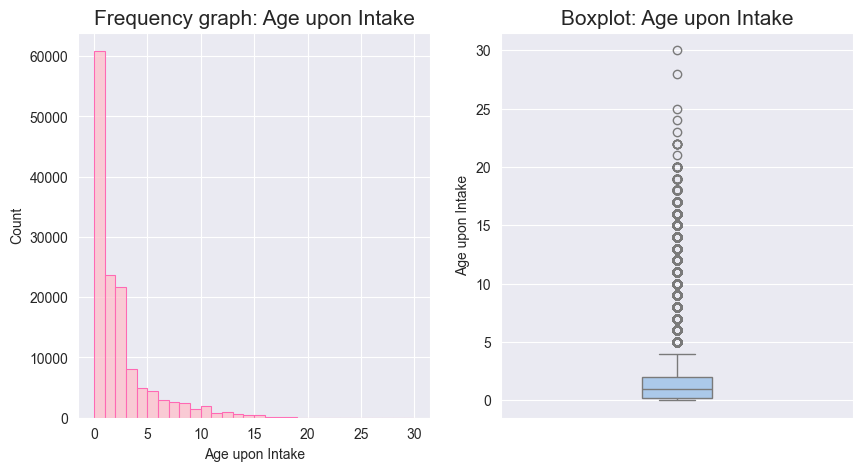

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_xlabel('Age upon Intake', fontdict={'size': 10})
ax1.set_ylabel('Count', fontdict={'size': 10})

ax2.set_ylabel('Age upon Intake', fontdict={'size': 10})

sns.histplot(
    data = intakes, 
    x = 'Age upon Intake', 
    kde = False, 
    binwidth = 1, 
    color = 'pink', 
    edgecolor = 'hotpink',
    ax=ax1
).set_title('Frequency graph: Age upon Intake', fontdict={'size': 15})

sns.boxplot(data=intakes, y='Age upon Intake', ax=ax2, width=0.2).set_title('Boxplot: Age upon Intake', fontdict={'size': 15})

plt.show()

Most of the animal are less than 1 year old upon intake (over 60 000). The rest is mostly younger than 4 years, we can see the outliers in the boxplot.

'DateTime' is quite tricky, date can be a numeric data, but we can also look at it as a categorical data. We will look at it as a categorical data. Numeric univariate statistics wouldn't tell us much here.

In [34]:
stats = univariate_categorical(intakes, 'DateTime')
display(stats)

,Frequency,Relative frequency
DateTime,,
2014-07-09 12:58:00,63,0.000455
2016-09-23 12:00:00,63,0.000455
2017-09-01 14:47:00,59,0.000426
2014-02-19 13:51:00,49,0.000354
2016-02-14 16:02:00,45,0.000325
...,...,...
2018-01-24 01:41:00,1,0.000007
2017-03-04 11:00:00,1,0.000007
2015-07-09 18:53:00,1,0.000007


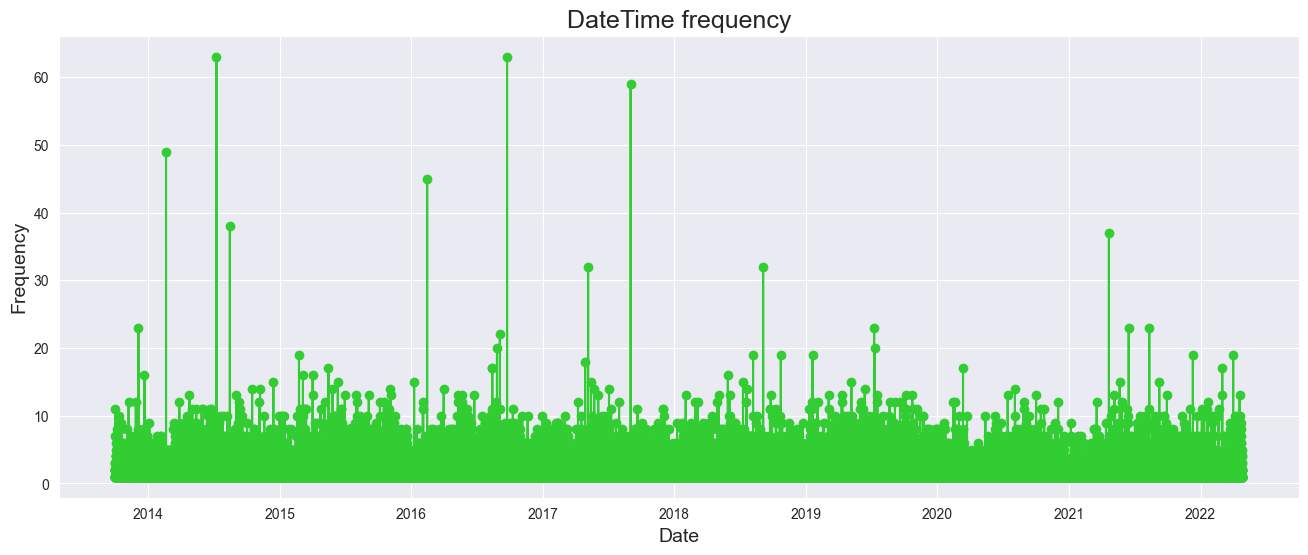

In [35]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(sorted(intakes['DateTime'].unique()), intakes['DateTime'].value_counts().sort_index(), 'o-', color='limegreen')
ax.set_title('DateTime frequency', size=18)
ax.set_ylabel('Frequency', size=14)
ax.set_xlabel('Date', size=14)
plt.show()

The graph might be a bit confusing since 'DateTime' has a lot of unique values. Frequency is usually under 20.

## More features

Let's look at 'Animal Type'. It's categorical data.

In [36]:
stats = univariate_categorical(intakes, 'Animal Type')
display(stats)

,Frequency,Relative frequency
Animal Type,,
Dog,78127,0.563862
Cat,52373,0.377989
Other,7372,0.053206
Bird,661,0.004771
Livestock,24,0.000173


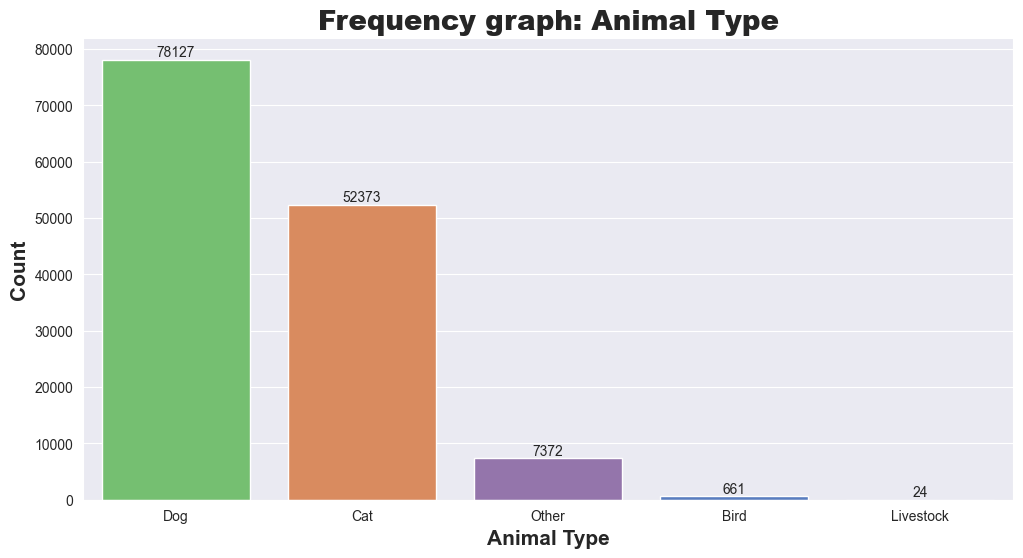

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel('Animal Type', fontdict={'size': 15, 'weight': 'bold'})
ax.set_ylabel('Count', fontdict={'size': 15, 'weight': 'bold'})

sns.countplot(
    data = intakes, x='Animal Type', 
    order = intakes['Animal Type'].value_counts().index,
    ax = ax,
    palette = 'muted',
    hue = 'Animal Type',
).set_title('Frequency graph: Animal Type', fontdict={'size': 20, 'weight': 'heavy'})

for container in ax.containers:
    ax.bar_label(container)
plt.show()

The overwhelming majority of animals consists of dogs and cats.

Next is 'Intake Type'. It's categorical data.

In [38]:
stats = univariate_categorical(intakes, 'Intake Type')
display(stats)

,Frequency,Relative frequency
Intake Type,,
Stray,95268,0.687573
Owner Surrender,28575,0.206233
Public Assist,8343,0.060213
Wildlife,5372,0.038771
Abandoned,740,0.005341
Euthanasia Request,259,0.001869


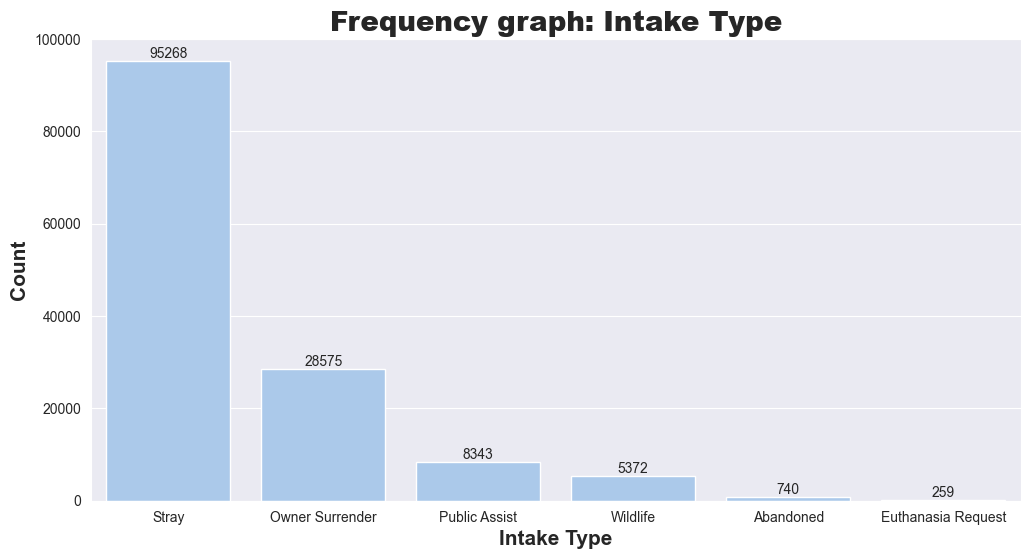

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_xlabel('Intake Type', fontdict={'size': 15, 'weight': 'bold'})
ax.set_ylabel('Count', fontdict={'size': 15, 'weight': 'bold'})

sns.countplot(
    data = intakes, x='Intake Type', 
    order = intakes['Intake Type'].value_counts().index, 
    ax = ax
).set_title('Frequency graph: Intake Type', fontdict={'size': 20, 'weight': 'heavy'})
ax.bar_label(ax.containers[0])
plt.show()

Most are stray. It is very rare for them to be 'Abandoned' or 'Euthenasia Request'.

'Sex upon Outcome' is categorical data.

In [40]:
stats = univariate_categorical(outcomes, 'Sex upon Outcome')
display(stats)

,Frequency,Relative frequency
Sex upon Outcome,,
Neutered Male,48864,0.382671
Spayed Female,44054,0.345002
Intact Male,17634,0.138098
Intact Female,17140,0.134229


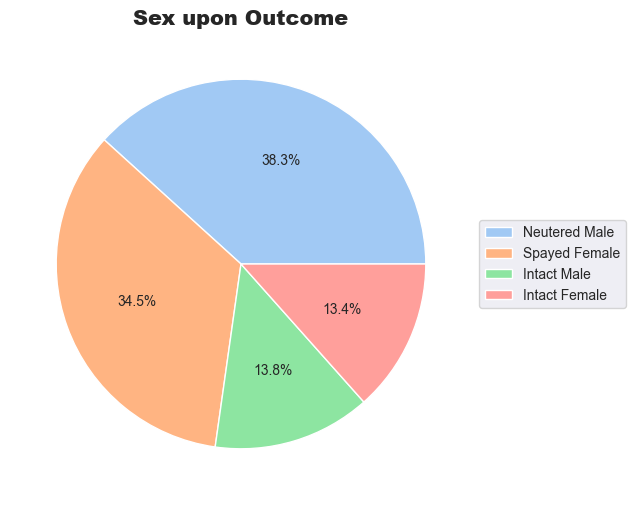

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Sex upon Outcome', fontdict={'size': 15, 'weight': 'heavy'})
ax.pie(stats['Frequency'], autopct='%1.1f%%')
ax.legend(stats.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The ratio of males and females is almost 1:1.

## Does the 'Animal Type' play a role in 'Outcome Type'

Both belong to Outcome dataset. Intuitively, the 'Animal Type' could have a slight effect.

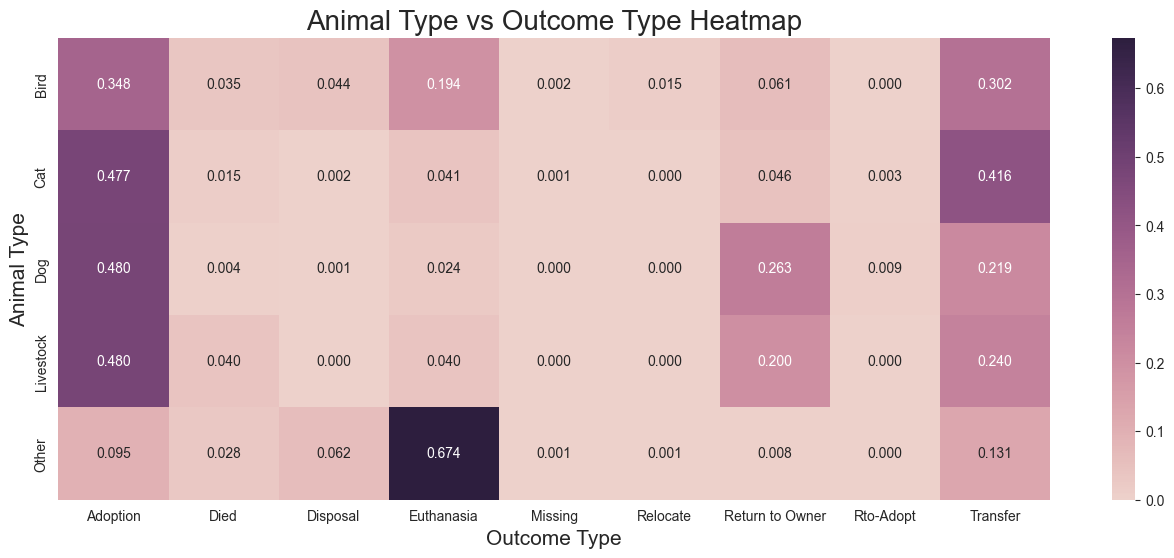

In [42]:
frequency_table = pd.crosstab(outcomes['Animal Type'], outcomes['Outcome Type'], normalize='index')

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('Outcome Type', fontdict={'size': 15})
ax.set_ylabel('Animal Type', fontdict={'size': 15})

sns.heatmap(frequency_table, 
    cmap=sns.cubehelix_palette(as_cmap=True), 
    annot=True, fmt='.3f', 
    ax=ax
).set_title('Animal Type vs Outcome Type Heatmap', fontdict={'size': 20})
plt.show()

We can see that most animals of any type fall into outcome types 'Adoption' and 'Transfer'. 'Other' animals however seem to have some relationship with 'Euthanasia'. Overall, 'Animal Type' most likely doesn't play a role in 'Outcome Type' with the exception of 'Other' animals perhaps.

## Outcome Type vs Intake Type

Does 'Outcome Type' depend on 'Intake Type'?

Let's just consider animals that occur in both datasets only once. We will create new datasets (intakesv2 and outcomesv2) with animals that fulfill this criteria. Lastly, we will merge the two new datasets.

In [43]:
intakesv2 = intakes.sort_values('Animal ID')
intakesv2.drop_duplicates(subset='Animal ID', keep=False, inplace=True)

In [44]:
outcomesv2 = outcomes.sort_values('Animal ID')
outcomesv2.drop_duplicates(subset='Animal ID', keep=False, inplace=True)

In [45]:
intakesv2 = intakesv2[intakesv2['Animal ID'].isin(outcomesv2['Animal ID'])]
outcomesv2 = outcomesv2[outcomesv2['Animal ID'].isin(intakesv2['Animal ID'])]

In [46]:
mergedDatasets = pd.merge(outcomesv2, intakesv2, on='Animal ID')

We will use a heatmap to explore the relationship.

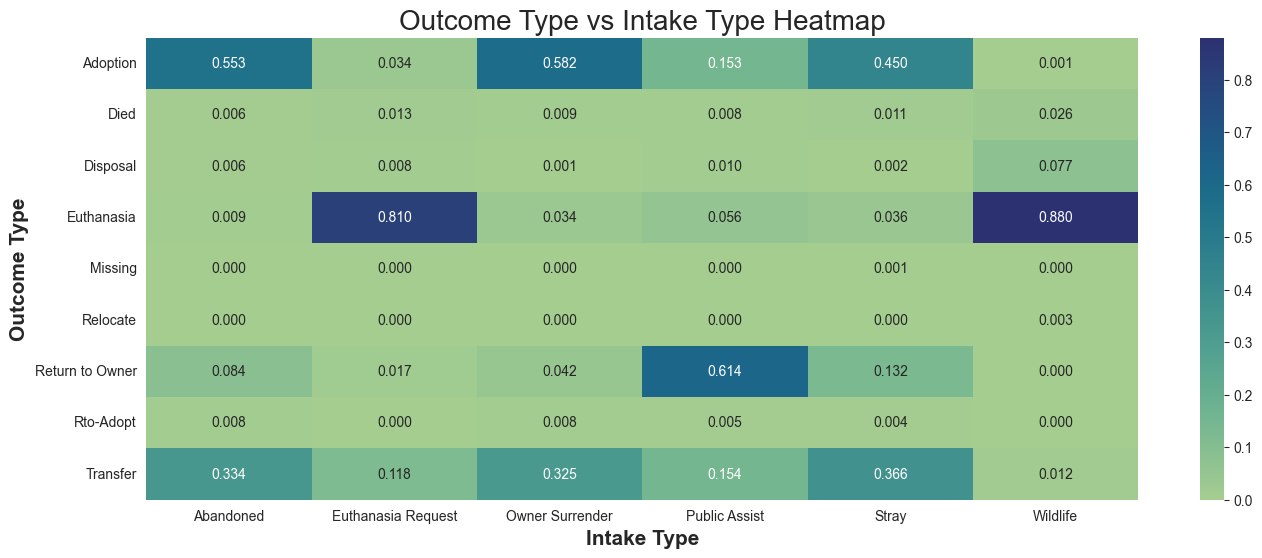

In [47]:
frequency_table = pd.crosstab(mergedDatasets['Outcome Type'], mergedDatasets['Intake Type'], normalize='columns')

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('Intake Type', fontdict={'size': 15, 'weight': 'bold'})
ax.set_ylabel('Outcome Type', fontdict={'size': 15, 'weight': 'bold'})

sns.heatmap(frequency_table, 
    cmap='crest', 
    annot=True, fmt='.3f', 
    ax=ax
).set_title('Outcome Type vs Intake Type Heatmap', fontdict={'size': 20})
plt.show()

Unsurprisingly, 'Euthanasia Request' has a strong relationship with 'Euthanasia'. 'Wildlife' also has a strong relationship with 'Euthanasia'. 'Public Assist' has moderate relationship with 'Return to Owner'. Other intake types usually result in either 'Adoption' or 'Transfer'.

Some outcome types depend quite heavily on intake types. Otherwise, it is mostly just 'Transfer' and 'Adoption'.

## Age vs adoption

Does age play a role in adoption?

We will use stacked histogram. All different outcome types will be defined as 'Other', we will make this change in a copy of outcomes.

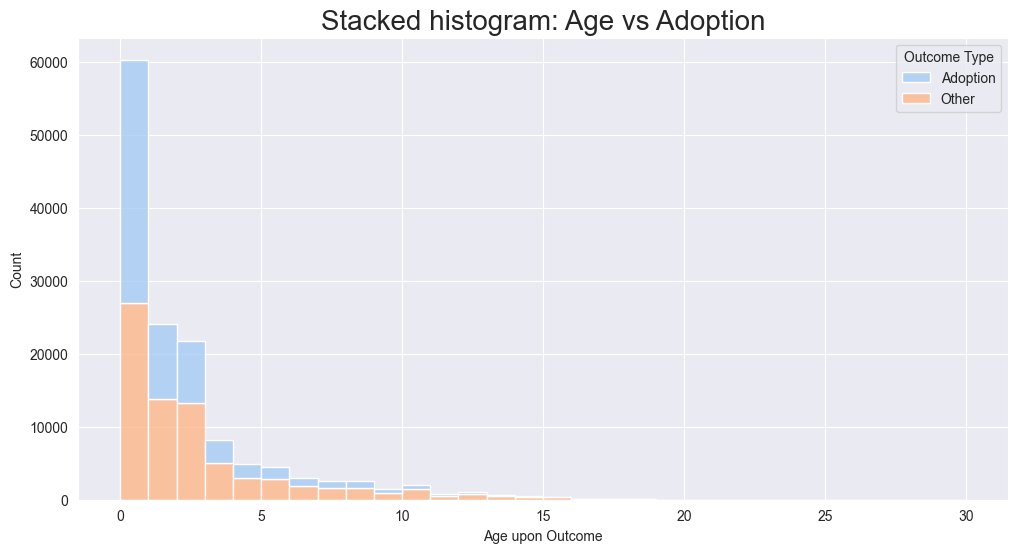

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
tmpOutcomes = outcomes.copy()


tmp = tmpOutcomes['Outcome Type'].unique()
tmpOutcomes['Outcome Type'] = tmpOutcomes['Outcome Type'].cat.add_categories('Other')

for val in tmp:
    if val != 'Adoption':
        tmpOutcomes.loc[tmpOutcomes['Outcome Type'] == val, 'Outcome Type'] = 'Other'
        tmpOutcomes['Outcome Type'] = tmpOutcomes['Outcome Type'].cat.remove_unused_categories()

sns.histplot(
    data=tmpOutcomes, x='Age upon Outcome', hue='Outcome Type', multiple='stack',
    palette=palette[:tmpOutcomes['Outcome Type'].nunique()], ax=ax, binwidth = 1
).set_title('Stacked histogram: Age vs Adoption', fontdict={'size': 20})
plt.show()

I wouldn't say that age plays a big role in adoption. However, we can see that the ratio of 'Adoption' gradually lowers with age. 'Adoption' has the best ratio for animals under 1 year old.

## Animal intake throughout the year

Is animal intake constant throughout the year or are there periods with more/less load?

We will make a new column in intakes called 'Month', we will extract this from 'DateTime' and make a line graph.

In [49]:
intakes['Month'] = intakes['DateTime'].dt.month

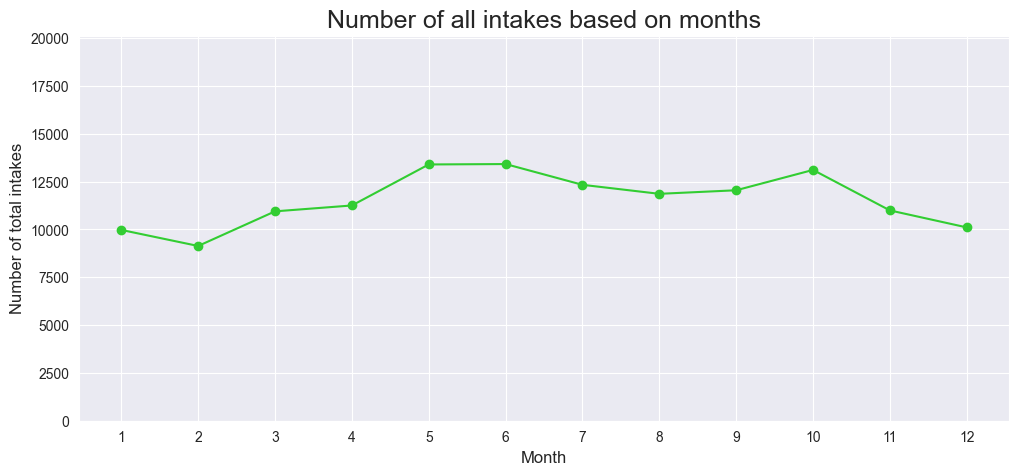

In [50]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylim([0, max(intakes['Month'].value_counts())*1.5])
ax.plot(sorted(intakes['Month'].unique()), intakes['Month'].value_counts().sort_index(), 'o-', color='limegreen')
ax.set_title('Number of all intakes based on months', size=18)
ax.set_ylabel('Number of total intakes', size=12)
ax.set_xlabel('Month', size=12)
plt.xticks(intakes['Month'].unique())
plt.show()

There are slightly higher peaks and slightly lower peaks. It is not quite constant, there's a noticable difference between highest and lowest peak.

## Sex vs Intake Condition

Does 'Sex' have a relationship with 'Intake Condition'? We are interested in "negative" conditions, we won't include 'Normal'. We will also look at 'Sex' as 'Male' and 'Female' and won't consider if they are 'Intact', 'Neutered' etc...

To investigate the relationship, we will use a stacked histogram and a heatmap.

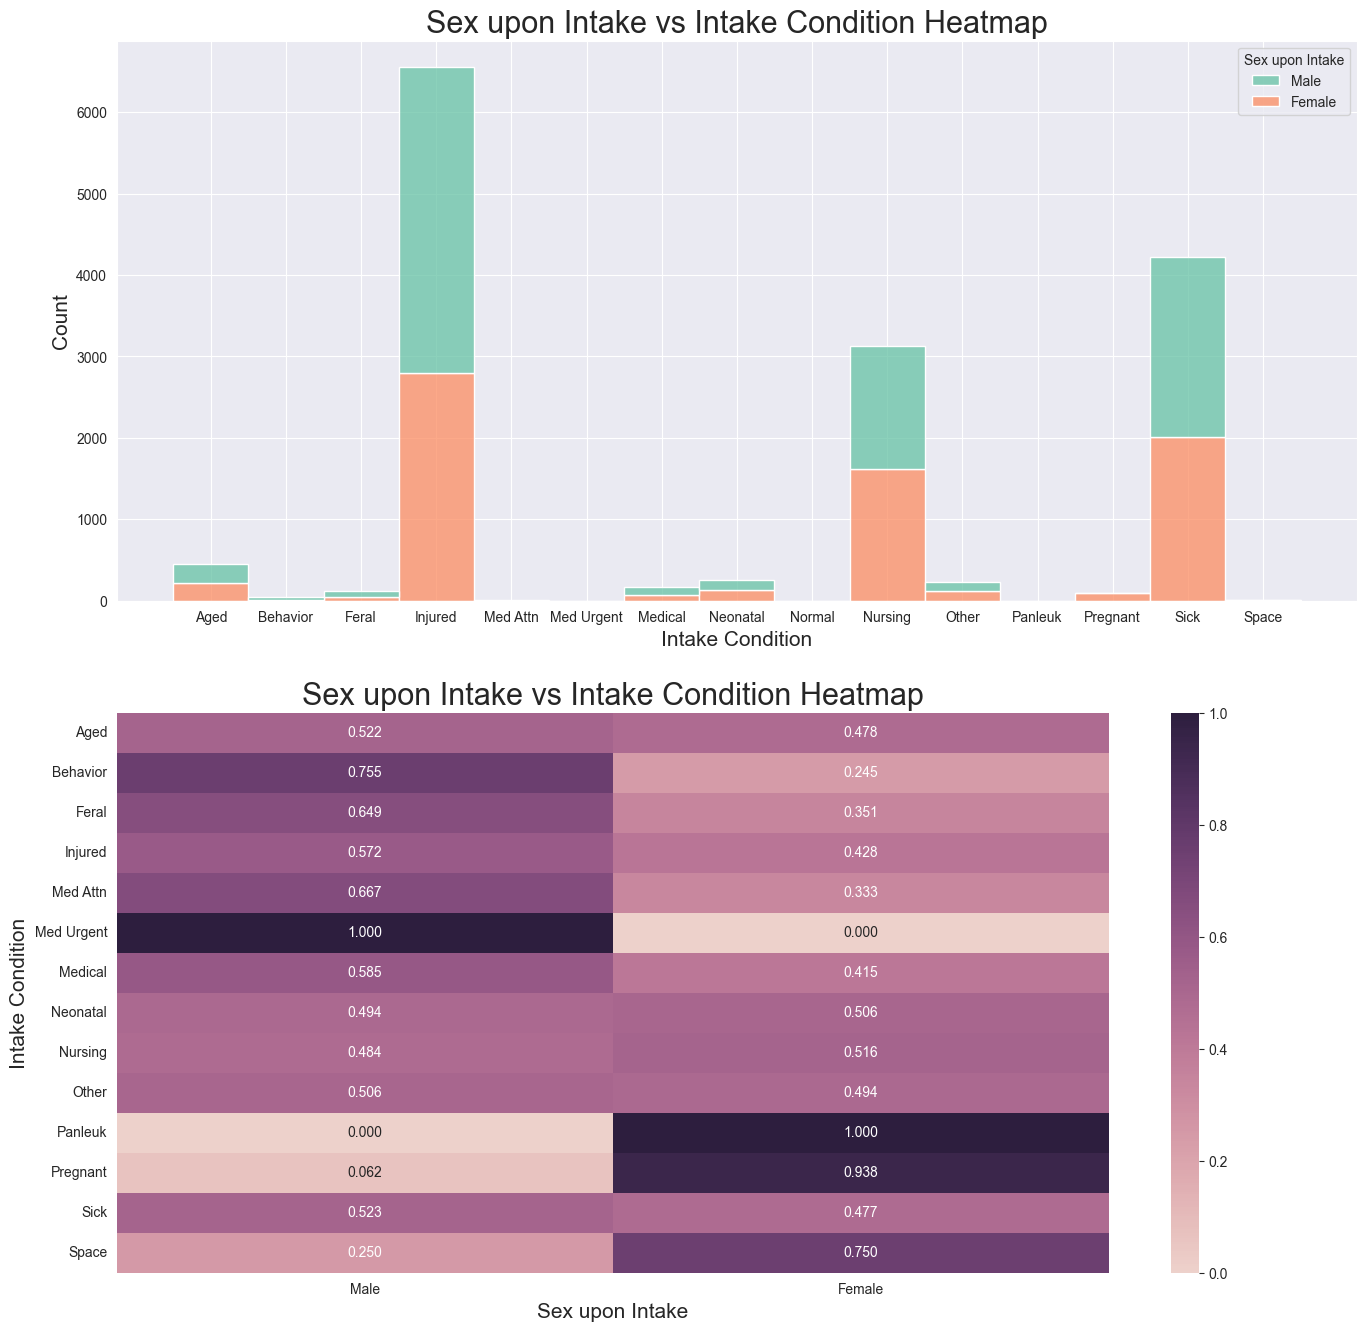

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
tmp = intakes[(intakes['Intake Condition'] != 'Normal') & (intakes['Sex upon Intake'].notna())].copy()

ax1.set_xlabel('Intake Condition', fontdict={'size': 15})
ax1.set_ylabel('Count', fontdict={'size': 15})

ax2.set_xlabel('Sex upon Intake', fontdict={'size': 15})
ax2.set_ylabel('Intake Condition', fontdict={'size': 15})

tmpSex = tmp['Sex upon Intake'].unique()
tmp['Sex upon Intake'] = tmp['Sex upon Intake'].cat.add_categories('Male')
tmp['Sex upon Intake'] = tmp['Sex upon Intake'].cat.add_categories('Female')

for val in tmpSex:
    if isinstance(val, str):
        if val.find('Male') != -1:
            tmp.loc[tmp['Sex upon Intake'] == val, 'Sex upon Intake'] = 'Male'
        if val.find('Female') != -1:
            tmp.loc[tmp['Sex upon Intake'] == val, 'Sex upon Intake'] = 'Female'

tmp['Sex upon Intake'] = tmp['Sex upon Intake'].cat.remove_unused_categories()

sns.histplot(
    data=tmp, x='Intake Condition', hue='Sex upon Intake', multiple='stack',
    palette="Set2", ax=ax1
).set_title('Sex upon Intake vs Intake Condition Heatmap', fontdict={'size': 22})

frequency_table = pd.crosstab(tmp['Intake Condition'], tmp['Sex upon Intake'], normalize='index')

ax.set_xlabel('Outcome Type', fontdict={'size': 15, 'weight': 'bold'})
ax.set_ylabel('Animal Type', fontdict={'size': 15, 'weight': 'bold'})

sns.heatmap(frequency_table, 
    cmap=sns.cubehelix_palette(as_cmap=True), 
    annot=True, fmt='.3f', 
    ax=ax2
).set_title('Sex upon Intake vs Intake Condition Heatmap', fontdict={'size': 22})

plt.show()

From the two graphs, we can see that the ratio is close to 1:1 for most conditions.

'Pregnant', 'Panleuk', 'Space' occurs overwhelmingly with 'Female'. 'Merd Urgent' seems to be a case so far only with 'Male'. Interestingly, there are some 'Male' that were 'Pregnant'.

'Behaviour', 'Feral' and 'Med Attn' are more related to 'Male'.

## Age vs 'Sick'

Is some age category more prone to being sick?

All intake conditions aside from 'Sick' will be redefined as 'Other'. We will use a histogram.

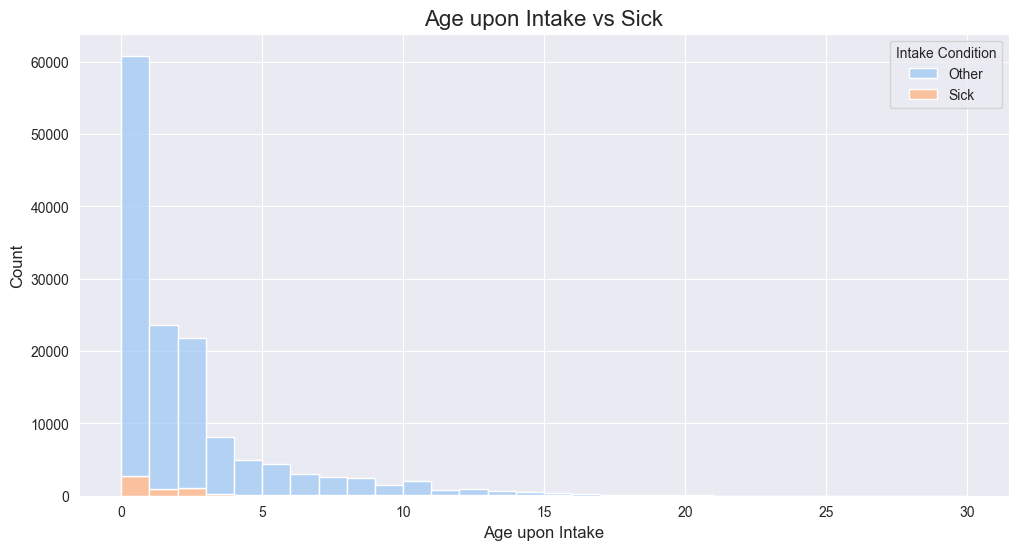

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
tmpIntakes = intakes.copy()

ax.set_xlabel('Age upon Intake', fontdict={'size': 12})
ax.set_ylabel('Count', fontdict={'size': 12})

tmp = tmpIntakes['Intake Condition'].unique()

for val in tmp:
    if val != 'Sick':
        tmpIntakes.loc[tmpIntakes['Intake Condition'] == val, 'Intake Condition'] = 'Other'
        tmpIntakes['Intake Condition'] = tmpIntakes['Intake Condition'].cat.remove_unused_categories()

sns.histplot(
    data=tmpIntakes, x='Age upon Intake', hue='Intake Condition', multiple='stack',
    palette=palette[:tmpIntakes['Intake Condition'].nunique()], ax=ax, binwidth = 1
).set_title('Age upon Intake vs Sick', fontdict={'size': 16})
plt.show()

The condition 'Sick' only appears in animals under 5 years of age, but it is not drastic. We conclude that age doesn't matter then.